In [1]:
#importing libraries needed 
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
%matplotlib inline

In [2]:
#import news articles 
articles = pd.read_csv('Articles.csv',encoding = "ISO-8859-1")

In [3]:
articles.head(15)

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business
5,New York: Oil prices tumbled Tuesday to fresh ...,1/7/2015,oil hits new 5.5 year lows as saudis defend,business
6,KARACHI: Strong bulls on Friday pulled the ben...,1/9/2015,bullish kse jumps over 33000 psychological bar...,business
7,"Singapore: Oil fell further in Asia Monday, wi...",1/12/2015,oil falls further in asian trad,business
8,KARACHI: Wholesale market rates for sugar drop...,1/13/2015,sugar prices drop to rs 49.80 in sind,business
9,SYDNEY: Oil prices fell 1 percent on Wednesday...,1/14/2015,oil extends losses as world bank cuts growth for,business


This dataset is from Kaggle.com. The dataset contains news articles from 2015 related to business and sports. It contains 4 coulmns, 'Article': which contains the actuale article, 'Date': referes to the date the article was written, 'Heading': The heading of the article, 'NewsType': weather or not if the article is about business or sports. 

In [4]:
#check the attributes of the dataset 
articles.describe()

,Article,Date,Heading,NewsType
count,2692,2692,2692,2692
unique,2584,666,2581,2
top,strong>ISLAMABAD: The International Monetary F...,8/1/2016,Pakistan will be among top 10 emerging markets...,sports
freq,5,27,5,1408


In [5]:
articles = articles.drop("Date", axis = 1)
#drop the date column. It is not useful 
articles.tail(20)

,Article,Heading,NewsType
2672,strong>Growth of sharia-compliant investment f...,Investment inflows spur Pakistans corporate su...,business
2673,Prime Minister Nawaz Sharif has proposed estab...,PM Nawaz proposes establishment of Pakistan Ku...,business
2674,strong>BEIJING: With related major energy and ...,CPEC becomes center point of transit trade rou,business
2675,strong>KUWAIT CITY: Kuwait is building one of ...,Kuwait Silk Road massive causeway,business
2676,MOSCOW: Russia and Turkey signed a memorandum ...,Russia Turkey create investment fund for up 1 ...,business
2677,strong>BEIJING: Dasu hydroelectric power proje...,Dasu hydroelectric project modernize energy se...,business
2678,strong>Oil prices dropped to their lowest in t...,Oil prices hit three month low as US rig count...,business
2679,strong>WASHINGTON: A company owned by the fami...,Trump son in law 4 bn deal Chinese company,business
2680,strong>RIYADH: Saudi Arabia is committed to st...,Saudi says committed to oil market stability,business
2681,strong>BEIJING: The Xinjiang Uygur autonomous ...,CPEC China approves huge infrastructure projec...,business


In [6]:
#check the word count of each heading and article 
articles['heading_word_count'] = articles['Heading'].apply(lambda x: len(str(x).split(" ")))
articles['article_word_count'] = articles['Article'].apply(lambda x: len(str(x).split(" ")))
print(articles.head())
print('Word Count AVGs:', articles[['article_word_count','heading_word_count' ]].mean())

                                             Article  \
0  KARACHI: The Sindh government has decided to b...   
1  HONG KONG: Asian markets started 2015 on an up...   
2  HONG KONG:  Hong Kong shares opened 0.66 perce...   
3  HONG KONG: Asian markets tumbled Tuesday follo...   
4  NEW YORK: US oil prices Monday slipped below $...   

                                             Heading  NewsType  \
0  sindh govt decides to cut public transport far...  business   
1                    asia stocks up in new year trad  business   
2           hong kong stocks open 0.66 percent lower  business   
3             asian stocks sink euro near nine year   business   
4                 us oil prices slip below 50 a barr  business   

   heading_word_count  article_word_count  
0                  12                 130  
1                   7                 760  
2                   7                  39  
3                   8                 547  
4                   8                 630  
Wo

In [265]:
#check the Character count for headings and articles 
articles['heading_char_count'] = articles['Article'].str.len() ## this also includes spaces
articles['article_char_count'] = articles['Heading'].str.len()
print('Char Count AVGs:', articles[['heading_char_count','article_char_count' ]].mean())

Char Count AVGs: heading_char_count    1810.019688
article_char_count      47.109955
dtype: float64


In [8]:
articles.head()

,Article,Heading,NewsType,heading_word_count,article_word_count,heading_char_count,article_char_count
0,KARACHI: The Sindh government has decided to b...,sindh govt decides to cut public transport far...,business,12,130,727,63
1,HONG KONG: Asian markets started 2015 on an up...,asia stocks up in new year trad,business,7,760,4820,31
2,HONG KONG: Hong Kong shares opened 0.66 perce...,hong kong stocks open 0.66 percent lower,business,7,39,240,40
3,HONG KONG: Asian markets tumbled Tuesday follo...,asian stocks sink euro near nine year,business,8,547,3257,38
4,NEW YORK: US oil prices Monday slipped below $...,us oil prices slip below 50 a barr,business,8,630,3782,34


In [9]:
#check the average word length of each article 
def avg_word_len (sentence):
    '''takes the average length of the words within each row'''
    words = sentence.split()
    return(sum(len(word) for word in words)/len(words))
articles['heading_avg_word_len'] = articles['Heading'].apply(lambda x: avg_word_len(x))
articles['article_avg_word_len'] = articles['Heading'].apply(lambda x: avg_word_len(x))
articles.head()

,Article,Heading,NewsType,heading_word_count,article_word_count,heading_char_count,article_char_count,heading_avg_word_len,article_avg_word_len
0,KARACHI: The Sindh government has decided to b...,sindh govt decides to cut public transport far...,business,12,130,727,63,4.333333,4.333333
1,HONG KONG: Asian markets started 2015 on an up...,asia stocks up in new year trad,business,7,760,4820,31,3.571429,3.571429
2,HONG KONG: Hong Kong shares opened 0.66 perce...,hong kong stocks open 0.66 percent lower,business,7,39,240,40,4.857143,4.857143
3,HONG KONG: Asian markets tumbled Tuesday follo...,asian stocks sink euro near nine year,business,8,547,3257,38,4.428571,4.428571
4,NEW YORK: US oil prices Monday slipped below $...,us oil prices slip below 50 a barr,business,8,630,3782,34,3.375000,3.375000


In [266]:
#Check the how many stop words each column has 
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

articles['heading_stopwords'] = articles['Heading'].apply(lambda x: len([x for x in x.split() if x in stop]))
articles['article_stopwords'] = articles['Article'].apply(lambda x: len([x for x in x.split() if x in stop]))
articles[['heading_stopwords','article_stopwords' ]].head()

,heading_stopwords,article_stopwords
0,2,35
1,2,204
2,0,7
3,0,173
4,2,192


After inital exploration of the data, it is time to plot the data to get a visual representation. 

### Visualize 

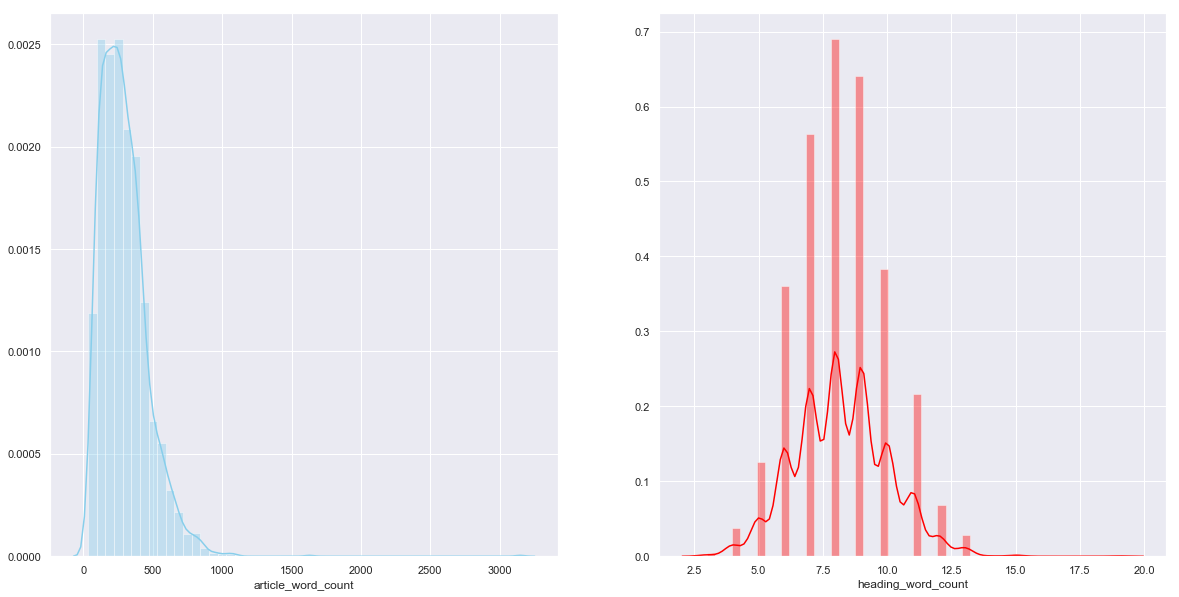

In [11]:
# plot the distrabutions of the artical and heading word count.
sns.set()
f, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=False)
sns.distplot(articles['article_word_count'], color='skyblue', label='article word count', ax=axes[0])
sns.distplot(articles['heading_word_count'], color='red', label='article word count',ax=axes[1])


plt.show()





Text(0.5, 1.0, 'Character count distrabution')

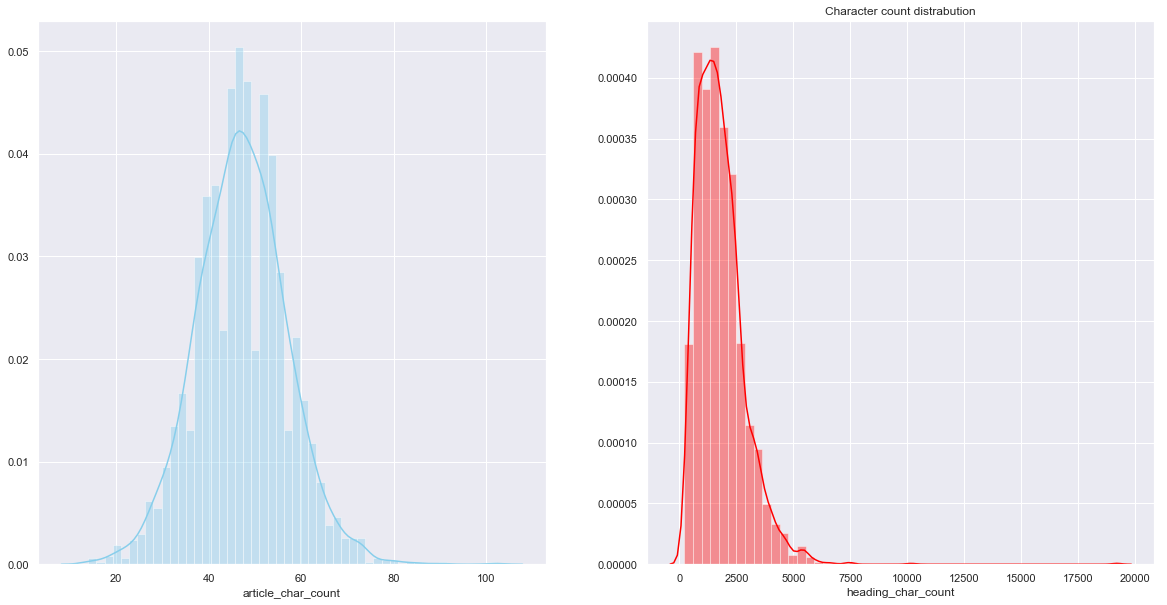

In [12]:
#plot the distrabution of article and heading character count 
f, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=False)
sns.distplot(articles['article_char_count'], color='skyblue', label='article word count',ax=axes[0])
sns.distplot(articles['heading_char_count'], color='red', label='article word count',ax=axes[1])
plt.title('Character count distrabution')

article word count seems to be skewed to the left and heading word count has a normal distrabution.
It is the opposite for character count.

Next, I will be plotting 'NewsType'.

Text(0.5, 22.960000000000015, 'Article Character Count')

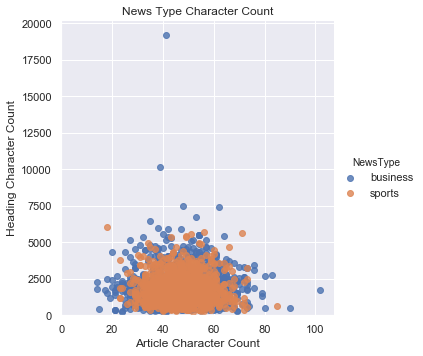

In [267]:
#plot the heading character count for business articles vs sports articles 
sns.lmplot(x='article_char_count', y='heading_char_count', data = articles,
          fit_reg=False, hue = 'NewsType')
plt.ylim(0,None)
plt.xlim(0,None)
plt.title('News Type Character Count')
plt.ylabel('Heading Character Count')
plt.xlabel('Article Character Count')

Text(0.5, 1.0, 'Article vs Heading word count')

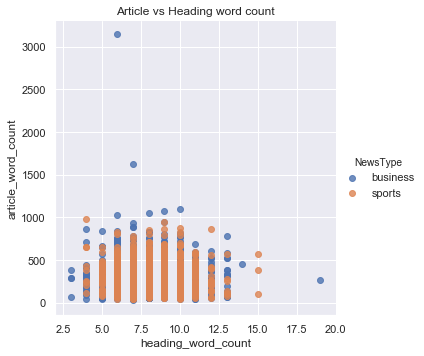

In [269]:
sns.lmplot(x='heading_word_count', y='article_word_count', data = articles,
          fit_reg=False, hue = 'NewsType')
plt.title('Article vs Heading word count')

Text(0.5, 1.0, 'Article word count by News Type')

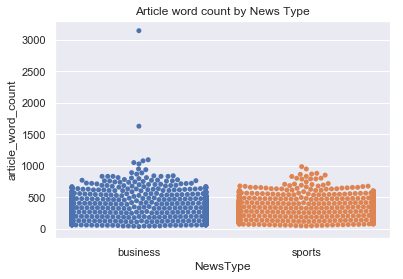

In [270]:
#plot article word count by News Type 
sns.swarmplot(x='NewsType', y='article_word_count',data=articles)
plt.title('Article word count by News Type')

Text(0.5, 1.0, 'Heading word count by News Type')

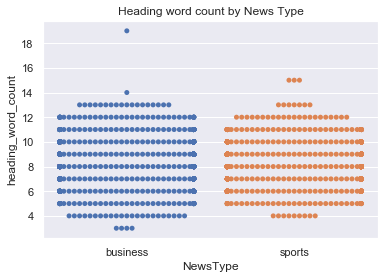

In [271]:
#plot heading word count by News Type 
sns.swarmplot(x='NewsType', y='heading_word_count',data=articles)
plt.title('Heading word count by News Type')

All of the data seems to be very similar. Note: There are a few outliers in the Buisness Heading word count.

After exploring the data, it is time for preprocessing. 

## Preprocessing 

In [248]:
#import neccssary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
nlp = spacy.load('en')


0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
2662    1
2663    1
2664    1
2665    1
2666    1
2667    1
2668    1
2669    1
2670    1
2671    1
2672    1
2673    1
2674    1
2675    1
2676    1
2677    1
2678    1
2679    1
2680    1
2681    1
2682    1
2683    1
2684    1
2685    1
2686    1
2687    1
2688    1
2689    1
2690    1
2691    1
Name: NewsType, Length: 2692, dtype: int64

In [ ]:
#Apply Spacy to each article and heading within the data frame 
articles.dropna()
articles['article_spacy'] = articles['article_after_colon']
articles['heading_spacy'] = articles['Heading']
articles['article_spacy'].apply(lambda x: nlp(x) if len(x) > 1 else None)
articles['heading_spacy'].apply(lambda x: nlp(x) if len(x) > 1 else None)
articles.head(20)

In [ ]:
art_text = articles['article_after_colon']
art_heading = articles['Heading']
art_text.head()

In [ ]:
# Apply Tf-idf to the articles & One Hot Encode News Type Column 
tdfif_article_x = vectorizer.fit_transform(articles['article_spacy'])
tdfif_article_x

tdfif_article_y = (articles['NewsType'] == 'business').astype(int)
#changes NewsType Column to numeric 
tdfif_article_y

In [ ]:
#check to see if there are any Null values 
articles[articles['article_after_colon'] == 'NoneType' ]

In [121]:
# Split the data into train test samples Holding out 10% of the data for testing. 10% is used because the data set is so small
tdfif_x_train, tdfif_x_test, tdfif_y_train, tdfif_y_test = train_test_split( tdfif_article_x,
                                                                            tdfif_article_y, test_size=0.10, random_state=42)

Time for modeling 

## Modeling 

In [275]:
#Apply K-Means Clustering to the dataset 
model = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1)
model.fit(tdfif_x_train)
tdfif_y_pred = model.predict(tdfif_x_test)

To make plotting easier Truncated SVD is applied as feature reduction

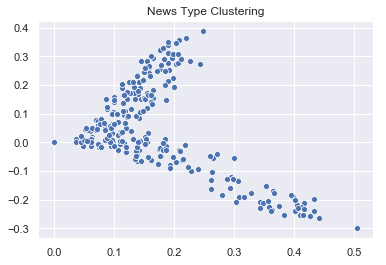

Comparing k-means clusters against the data:
NewsType   0   1
row_0           
0         87   0
1         52  89
2          0  42


In [276]:
X_tsvd = TruncatedSVD(2).fit_transform(tdfif_x_test)
sns.scatterplot(X_tsvd [:, 0], X_tsvd [:, 1])
plt.title('News Type Clustering')
plt.show()
print('Comparing k-means clusters against the data:')
print(pd.crosstab(tdfif_y_pred, tdfif_y_test))


K-Means performs poorly will try Mini Batch Kmeans 

In [277]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=200)
minibatchkmeans.fit(X_tsvd)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_tsvd)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, tdfif_y_pred))

Comparing k-means and mini batch k-means solutions:
col_0   0    1   2
row_0             
0       1  134   0
1       0    3  42
2      86    4   0


Try Mean Shift

In [187]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [199]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(tdfif_x_train.toarray(), quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=3, bin_seeding=True)
ms.fit(tdfif_x_train.toarray())
ms_y_predict = ms.predict(tdfif_x_test)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))



Number of estimated clusters: 1


In [ ]:
#plt.scatter(tdfif_x_train[:, 0], tdfif_x_train[:, 1])
#plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(ms_y_predict, tdfif_y_test))

The Clustering doesnt seem to work out to well. Time to attempt supervised algorithms

In [217]:
from sklearn.cluster import SpectralClustering

n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(tdfif_x_train)

#Predicted clusters.
predict=sc.fit_predict(tdfif_x_test)


print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(tdfif_y_test,predict))

Comparing the assigned categories to the ones in the data:
col_0      0   1   2  3   4
NewsType                   
0         75   0  64  0   0
1         83  19   0  2  27


In [218]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
#Apply Affinity propagation
af = AffinityPropagation().fit(tdfif_x_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 224


Affinty propagation suggests that we use 224 clusters. I believe 224 clusters is to many.

In [173]:
#print out the top ten words within clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 tons
 metric
 exports
 million
 period
 financial
 food
 valuing
 year
 exported
Cluster 1:
 said
 pakistan
 percent
 oil
 england
 year
 test
 world
 cricket
 india


## Supervised Modeling prep

In [227]:
articles.head()



,Article,Heading,NewsType,heading_word_count,article_word_count,heading_char_count,article_char_count,heading_avg_word_len,article_avg_word_len,heading_stopwords,article_stopwords,article_after_colon,article_spacy,heading_spacy
0,KARACHI: The Sindh government has decided to b...,sindh govt decides to cut public transport far...,business,12,130,727,63,4.333333,4.333333,2,35,The Sindh government has decided to bring dow...,The Sindh government has decided to bring dow...,sindh govt decides to cut public transport far...
1,HONG KONG: Asian markets started 2015 on an up...,asia stocks up in new year trad,business,7,760,4820,31,3.571429,3.571429,2,204,Asian markets started 2015 on an upswing in l...,Asian markets started 2015 on an upswing in l...,asia stocks up in new year trad
2,HONG KONG: Hong Kong shares opened 0.66 perce...,hong kong stocks open 0.66 percent lower,business,7,39,240,40,4.857143,4.857143,0,7,Hong Kong shares opened 0.66 percent lower M...,Hong Kong shares opened 0.66 percent lower M...,hong kong stocks open 0.66 percent lower
3,HONG KONG: Asian markets tumbled Tuesday follo...,asian stocks sink euro near nine year,business,8,547,3257,38,4.428571,4.428571,0,173,Asian markets tumbled Tuesday following painf...,Asian markets tumbled Tuesday following painf...,asian stocks sink euro near nine year
4,NEW YORK: US oil prices Monday slipped below $...,us oil prices slip below 50 a barr,business,8,630,3782,34,3.375000,3.375000,2,192,US oil prices Monday slipped below $50 a barr...,US oil prices Monday slipped below $50 a barr...,us oil prices slip below 50 a barr


After looking at the articles, I noticed they lead with a city followed by a colon. I will remove the colon to have just the text.

In [278]:
#start a new column with the acticle without the cities.
articles['article_after_colon']= articles['Article'].apply(lambda x: x.split(':')[1] if len(x.split(':')) > 1 else 'y')
articles.head()



,Article,Heading,NewsType,heading_word_count,article_word_count,heading_char_count,article_char_count,heading_avg_word_len,article_avg_word_len,heading_stopwords,article_stopwords,article_after_colon,article_spacy,heading_spacy
0,KARACHI: The Sindh government has decided to b...,sindh govt decides to cut public transport far...,business,12,130,727,63,4.333333,4.333333,2,35,The Sindh government has decided to bring dow...,The Sindh government has decided to bring dow...,sindh govt decides to cut public transport far...
1,HONG KONG: Asian markets started 2015 on an up...,asia stocks up in new year trad,business,7,760,4820,31,3.571429,3.571429,2,204,Asian markets started 2015 on an upswing in l...,Asian markets started 2015 on an upswing in l...,asia stocks up in new year trad
2,HONG KONG: Hong Kong shares opened 0.66 perce...,hong kong stocks open 0.66 percent lower,business,7,39,240,40,4.857143,4.857143,0,7,Hong Kong shares opened 0.66 percent lower M...,Hong Kong shares opened 0.66 percent lower M...,hong kong stocks open 0.66 percent lower
3,HONG KONG: Asian markets tumbled Tuesday follo...,asian stocks sink euro near nine year,business,8,547,3257,38,4.428571,4.428571,0,173,Asian markets tumbled Tuesday following painf...,Asian markets tumbled Tuesday following painf...,asian stocks sink euro near nine year
4,NEW YORK: US oil prices Monday slipped below $...,us oil prices slip below 50 a barr,business,8,630,3782,34,3.375000,3.375000,2,192,US oil prices Monday slipped below $50 a barr...,US oil prices Monday slipped below $50 a barr...,us oil prices slip below 50 a barr


In [279]:
#Perform 'L2' Logistic regression on the data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2') # No need to specify l2 as it's the default. But we put it for demonstration.
train = lr.fit(tdfif_x_train, tdfif_y_train)
#print(X_train.shape, y_train.shape)
print('Training set score:', lr.score(tdfif_x_train, tdfif_y_train))
print('\nTest set score:', lr.score(tdfif_x_test, tdfif_y_test))

Training set score: 0.9863748967795211

Test set score: 0.9740740740740741


/Users/christianfreeman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


This performs very well! I am comfortable with the outcome, but will try another model.

In [280]:
#Try Gradient Boost 
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier()
#fit the model
train = clf.fit(tdfif_x_train, tdfif_y_train)

print('Training set score:', clf.score(tdfif_x_train, tdfif_y_train))
print('\nTest set score:', clf.score(tdfif_x_test, tdfif_y_test))

Training set score: 0.9863748967795211

Test set score: 0.9629629629629629


Not as well as Logistic Regression model, but close.

In [252]:
tdfif_x_train

<2422x24791 sparse matrix of type '<class 'numpy.float64'>'
	with 261705 stored elements in Compressed Sparse Row format>

In [259]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(1000)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
x_train_lsa = lsa.fit_transform(tdfif_x_train)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(x_train_lsa)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 78.56574126878654
Component 0:
2068    0.525093
1169    0.507785
2336    0.502911
1820    0.502903
2326    0.499731
1573    0.494242
1445    0.492498
2148    0.489107
2073    0.487780
1780    0.483292
Name: 0, dtype: float64
Component 1:
1495    0.442065
564     0.435199
1925    0.428812
1113    0.404662
1114    0.400013
1094    0.398529
1935    0.386681
2057    0.386158
561     0.384102
940     0.383149
Name: 1, dtype: float64
Component 2:
2092    0.402243
652     0.373173
503     0.364389
2336    0.351296
415     0.342566
230     0.341222
891     0.336470
210     0.336457
1097    0.329347
1519    0.328572
Name: 2, dtype: float64
Component 3:
526     0.403645
1853    0.372891
1852    0.368786
1332    0.368786
1949    0.364730
1803    0.359839
656     0.354659
1739    0.354659
378     0.354659
578     0.354659
Name: 3, dtype: float64
Component 4:
1597    0.396530
1113    0.379325
1066    0.363447
1495    0.360911
674     0.358284
1967    0.3

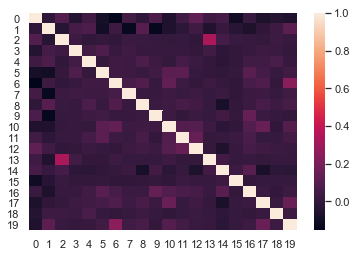

Key:
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [261]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(x_train_lsa) * np.asmatrix(x_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity).iloc[0:20,0:20]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(20))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

## Conclusion 

For my texts, clustering did not perform very well, but modeling perfomed extremely well. Logistic regression perfomed the best out of all modeling. For this spacific text, I didnt see any advantages for clustering the text. The advantages for for modeling the text are: speed — prepping and fitting the data performed much faster on modeling. Accuracy — modeling the text was alot more accurate than clustering for this specific text. 
